<a href="https://colab.research.google.com/github/peyda58/hello-world/blob/master/summarize2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# -- coding: utf-8 --
"""
2021
author: hossein rezaei
"""
import numpy as np
import networkx as nx
#import nltk 
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import heapq
import sys
import math
import matplotlib.pyplot as plt

In [94]:

# ============================ 
# ====== Load input ======
agricultural_text = "آب از اساسی ترین عناصری است که باعث وجود حیات می شود. همه موجودات زنده کوچک و بزرگ به این ماده نیاز دارند. بیشترین قسمت اعضاء موجودات را این مایع به شکلهای مختلف تشکیل می دهد. این مایع حیاتی باعث ایجاد ارتباط و همزیستی موجودات و گیاهان در کنار یکدیگر می شود. بیشتر فعالیت های شیمیایی درون و بیرون از بدن موجودات زنده و فرسایش و تجزیه و تحلیل عناصر غیرزنده در کنار آب انجام می شود. می توان گفت، اولین گروه موجودات زنده که از آب استفاده می  کنند و باعث ایجاد چرخه ی زیستی می شوند، گیاهان هستند. "  

In [95]:
# ============================     
# ====== PreProcessing: Sentence Splitting====== 
sentences_tokens = agricultural_text.split(".")
documents = [];
for sen in sentences_tokens:
    if len(sen)>2:
        documents.append(sen)

In [96]:
        
# ============================     
# ====== PreProcessing: Tokenization====== 
dictOfWords = {}
for index, sentence in enumerate(documents):
    tokenizedWords = sentence.split(' ')
    dictOfWords[index] = [(word,tokenizedWords.count(word)) for word in tokenizedWords]


In [97]:

# ============================     
# ====== Calculate term frequency (TF)====== 
termFrequency = {}
for i in range(0, len(documents)):
    listOfNoDuplicates = []
    for wordFreq in dictOfWords[i]:
        if wordFreq not in listOfNoDuplicates:
            listOfNoDuplicates.append(wordFreq)
        termFrequency[i] = listOfNoDuplicates

# =============================================================================
#P.S: The result were better without StopWords Removal and persian Stemming
#=====================remove stopwords=============================     
#stopwords_list = stopwords.words('persian')
#print(stopwords_list)
#=====================persian Stemming=============================     
#st = ISRIStemmer()
#words_stemm = [st.stem(word) for word in words_tokens]
##print(words_stemm)
# ============================================================================



In [98]:
# ====== Normalize====== 
#To avoid problem longer (sentences)documents 
#Third: normalized term frequency       
normalizedTermFrequency = {}
for i in range(0, len(documents)):
    sentence = dictOfWords[i]
    lenOfSentence = len(sentence)
#    print(lenOfSentence)
    listOfNormalized = []
    for wordFreq in termFrequency[i]:
        normalizedFreq = wordFreq[1]/lenOfSentence
        listOfNormalized.append((wordFreq[0],normalizedFreq))
    normalizedTermFrequency[i] = listOfNormalized

In [99]:
# ============================     
# ====== Calculate Inverse Term Frequency (IDF)====== 
#First: put all sentences together and tokenze words
# ============================     
# ====== PreProcessing: Sentence Splitting and Tokenization====== 
allDocuments = ''
for sentence in documents:
    allDocuments += sentence + ' '
allDocumentsTokenized = allDocuments.split(' ')
# ============================   
#---Calculate IDF
allDocumentsNoDuplicates = []
for word in allDocumentsTokenized:
    if word not in allDocumentsNoDuplicates:
        allDocumentsNoDuplicates.append(word)
# ============================   
#Second calculate the number of documents where the term t appears
dictOfNumberOfDocumentsWithTermInside = {}
# ovc = vocabilary OR word
for index, voc in enumerate(allDocumentsNoDuplicates):
    count = 0
    for sentence in documents:
        if voc in sentence:
            count += 1
    dictOfNumberOfDocumentsWithTermInside[index] = (voc, count)

# ============================   
#calculate IDF
dictOFIDFNoDuplicates = {} 

for i in range(0, len(normalizedTermFrequency)):
    listOfIDFCalcs = []
    for word in normalizedTermFrequency[i]:
        for x in range(0, len(dictOfNumberOfDocumentsWithTermInside)):
            if word[0] == dictOfNumberOfDocumentsWithTermInside[x][0]:
                listOfIDFCalcs.append((word[0],math.log(len(documents)/dictOfNumberOfDocumentsWithTermInside[x][1])))
    dictOFIDFNoDuplicates[i] = listOfIDFCalcs

# ============================   
#---------Multiply tf by idf for tf-idf

dictOFTF_IDF = {}
for i in range(0,len(normalizedTermFrequency)):
    listOFTF_IDF = []
    TFsentence = normalizedTermFrequency[i]
    IDFsentence = dictOFIDFNoDuplicates[i]
    for x in range(0, len(TFsentence)):
#        print(TFsentence[x][0])
#        print(TFsentence[x][1])
        listOFTF_IDF.append((TFsentence[x][0],TFsentence[x][1]*IDFsentence[x][1]))
    dictOFTF_IDF[i] = listOFTF_IDF



In [100]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [101]:
sentences_list = tokenize(agricultural_text)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

The size of the list in Bytes is: 144
The size of the item 0 in Bytes is: 180
<class 'list'>
The size of the list "sentences" is: 6
آب از اساسی ترین عناصری است که باعث وجود حیات می شود.
همه موجودات زنده کوچک و بزرگ به این ماده نیاز دارند.
بیشترین قسمت اعضاء موجودات را این مایع به شکلهای مختلف تشکیل می دهد.
این مایع حیاتی باعث ایجاد ارتباط و همزیستی موجودات و گیاهان در کنار یکدیگر می شود.
بیشتر فعالیت های شیمیایی درون و بیرون از بدن موجودات زنده و فرسایش و تجزیه و تحلیل عناصر غیرزنده در کنار آب انجام می شود.
می توان گفت، اولین گروه موجودات زنده که از آب استفاده می  کنند و باعث ایجاد چرخه ی زیستی می شوند، گیاهان هستند.


In [102]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [118]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["آب از اساسی ترین عناصری است که باعث وجود حیات می شود. ", "این مایع حیاتی باعث ایجاد ارتباط و همزیستی موجودات و گیاهان در کنار یکدیگر می شود. "] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
 [0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1]]
Feature list: ['آب', 'ارتباط', 'از', 'اساسی', 'است', 'ایجاد', 'این', 'باعث', 'ترین', 'حیات', 'حیاتی', 'در', 'شود', 'عناصری', 'مایع', 'موجودات', 'می', 'همزیستی', 'وجود', 'کنار', 'که', 'گیاهان', 'یکدیگر']


In [104]:

# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.23269083 0.         0.23269083 0.33610667 0.33610667 0.
  0.         0.         0.         0.         0.         0.23269083
  0.         0.         0.         0.         0.         0.
  0.         0.         0.33610667 0.         0.         0.33610667
  0.         0.         0.         0.         0.         0.
  0.         0.         0.23269083 0.         0.         0.
  0.         0.33610667 0.         0.         0.         0.
  0.         0.         0.         0.         0.17219643 0.
  0.         0.         0.         0.         0.33610667 0.
  0.         0.         0.27561228 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.24641518 0.
  0.         0.3559306  0.29186818 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.3559306  0.         0.         0.         0.
  0.24641518 0.         0.         0.         0.         0.

In [105]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <62x6 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Column format>>


Number of edges 20
Number of vertices 6


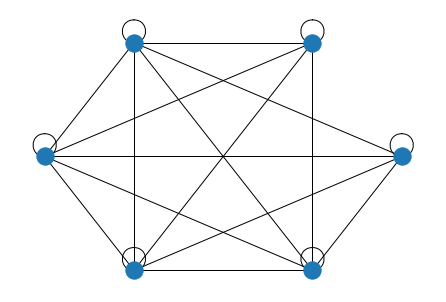

The memory used by the graph in Bytes is: 64


In [106]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [107]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 376
0 0.16083681578387968
1 0.1526724142479552
2 0.15907979373686082
3 0.1834834013634465
4 0.1647746761827282
5 0.1791528986851292


In [108]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [109]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [110]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.1834834013634465
0.1526724142479552


In [111]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

6


In [112]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [113]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [114]:
model = sentence_list

In [115]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

این مایع حیاتی باعث ایجاد ارتباط و همزیستی موجودات و گیاهان در کنار یکدیگر می شود. می توان گفت، اولین گروه موجودات زنده که از آب استفاده می  کنند و باعث ایجاد چرخه ی زیستی می شوند، گیاهان هستند.


<function TextIOWrapper.close>

In [116]:
for lines in sentence_list:
    print(lines)

این مایع حیاتی باعث ایجاد ارتباط و همزیستی موجودات و گیاهان در کنار یکدیگر می شود.
می توان گفت، اولین گروه موجودات زنده که از آب استفاده می  کنند و باعث ایجاد چرخه ی زیستی می شوند، گیاهان هستند.
